<a href="https://colab.research.google.com/github/angelicasharon/Angelicashrn/blob/main/Tugas9/Tugas9_ClasssificationNN_Angelica_Sharon_1103210032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Angelica Sharon Amelia Simanjuntak

NIM: 1103210032

Tugas 9: Classsification Using Neural Network

Dataset: housepricedata.csv

ChatGPT Prompt: https://chatgpt.com/share/8108aed5-ce23-41fa-8f23-8c095b4be7c2

In [4]:
#Connect Gdrive to Gcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Read dataset**

In [5]:
import pandas as pd

# Path ke file housepricedata.csv di Google Drive
file_path = '/content/drive/MyDrive/Dataset1/housepricedata.csv'

# Membaca file CSV ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
df.head()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# **Importing libraries**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# **Define feature columns and target**

In [7]:
# Define feature columns and target column
features = ['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea']
target = 'AboveMedianPrice'

# **Separate and normalize the feature**

In [8]:
# Separate features and target
X = df[features]
y = df[target]

# Normalize the feature data to range [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# **Split data**

In [9]:
# Split data into 70% training and 30% validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, train_size=0.7, random_state=42)

# Further split the 30% data into 50% validation and 50% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# **Create the neural network model**

In [10]:
# Create the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6862 - accuracy: 0.5152 - val_loss: 0.6803 - val_accuracy: 0.5479
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5504 - val_loss: 0.6718 - val_accuracy: 0.5753
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5749 - val_loss: 0.6643 - val_accuracy: 0.6119
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6102 - val_loss: 0.6572 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6445 - val_loss: 0.6503 - val_accuracy: 0.7123
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.7199 - val_loss: 0.6439 - val_accuracy: 0.7123
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.7091 - val_loss: 0.6375 - val_accuracy: 0.7352
Epoch 8/100
3

# **Evaluate**

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.8864
Test Loss: 0.2743419408798218
Test Accuracy: 0.8863636255264282


# **Visualize the loss and accuracy**

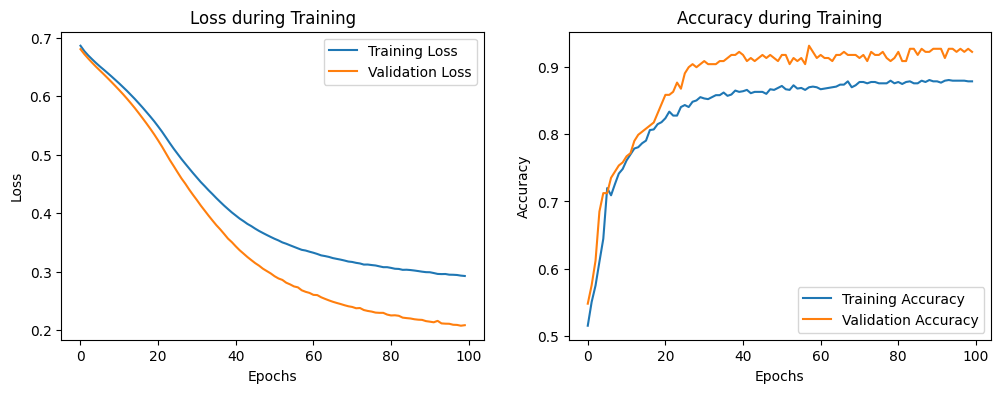

In [12]:
# Visualize the loss and accuracy during training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()